# 自我訓練(Self-training)測試

## 載入相關套件

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.semi_supervised import SelfTrainingClassifier

## 載入資料集

In [2]:
X, y = datasets.load_iris(return_X_y=True)
X = X[:, :2]#只取前2個特徵
X.shape

(150, 2)

## 資料分割

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

## 設定 30% 資料為沒有標註(-1)

150筆資料分割80% 20%
train data = 150*80% = 120

In [ ]:
rng = np.random.RandomState(0) #產生隨機數
y_rand = rng.rand(y_train.shape[0])#訓練資料120筆-->產生120個隨機小數
print(y_rand[:20])

[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152 0.79172504 0.52889492
 0.56804456 0.92559664 0.07103606 0.0871293  0.0202184  0.83261985
 0.77815675 0.87001215]


In [5]:
# train:120筆 ; test:30筆
y_30 = np.copy(y_train)
y_30[y_rand < 0.3] = -1 #將亂數值<0.3的改成 -1
np.count_nonzero(y_30==-1)#統計 -1 的數量


np.int64(38)

train data = 120筆

未標註 data = 38筆

In [6]:
y_30_index = np.where(y_30==-1)[0]#找出對應 y=-1的index
y_30_index

array([ 14,  15,  16,  24,  26,  30,  34,  43,  46,  47,  53,  54,  55,
        57,  59,  60,  61,  63,  64,  67,  69,  75,  76,  77,  78,  79,
        82,  85,  87,  92,  94,  95,  97,  99, 101, 104, 108, 113])

In [7]:
type(y_30_index)

numpy.ndarray

## 模型訓練

In [ ]:
base_classifier = SVC(kernel="rbf", gamma=0.5, probability=True) # SVC當基底分類器, kernel = "rbf" 表示 , gamma=0.5, probability=True 啟用機率估計
clf = SelfTrainingClassifier(base_classifier).fit(X_train, y_30)

## 繪製決策邊界

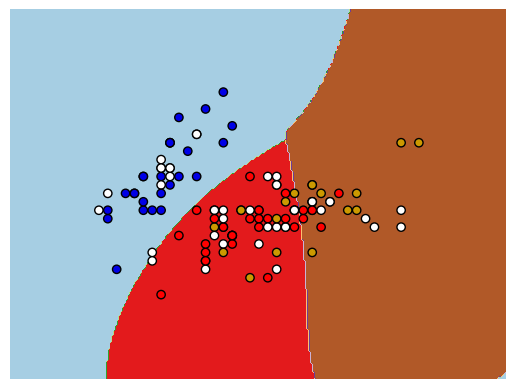

In [9]:
# 建立 mesh grid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# 每個標籤不同顏色(RGB)
color_map = {-1: (1, 1, 1), 0: (0, 0, 0.9), 1: (1, 0, 0), 2: (0.8, 0.6, 0)}
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# 繪製等高線
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("off")

# 繪製實際點
colors = [color_map[y] for y in y_30]
plt.scatter(X_train[:, 0], X_train[:, 1], c=colors, edgecolors="black")

白色 是 -1的樣本

## SVM (SVC) 模型評估
SVC分類

In [10]:
base_classifier.fit(X_train, y_30)
base_classifier.score(X_test, y_test)

0.7

## Self-training 模型評估

In [11]:
clf.score(X_test, y_test)

0.8666666666666667

In [12]:
clf.transduction_.shape

(120,)

## 完整資料進行模型評估

將y 標註為-1的程式含意和上面相同, 寫法不同

In [ ]:
rng = np.random.RandomState(42) # 產生隨機數
X, y = datasets.load_iris(return_X_y=True)
random_unlabeled_points = rng.rand(y.shape[0]) < 0.3
y[random_unlabeled_points] = -1

svc = SVC(probability=True, gamma="auto")
self_training_model = SelfTrainingClassifier(svc)
self_training_model.fit(X, y)

,estimator,SVC(gamma='au...bability=True)
,base_estimator,'deprecated'
,threshold,0.75
,criterion,'threshold'
,k_best,10
,max_iter,10
,verbose,False
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'auto'


## 不使用self-training 模型的分數

In [14]:
svc.fit(X[y >= 0], y[y >= 0])
svc.score(X, y)

0.66

## 使用self-training 模型的分數

In [15]:
X, y = datasets.load_iris(return_X_y=True)
self_training_model.score(X, y)

0.9733333333333334